# Working with Strings In Pandas
## About
In the previous lesson, we learned how to use the apply(), map(), and applymap() methods to apply a function to a series. While we could certainly use these methods to clean strings in columns, pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

- Cleaning column names
- Extracting values from the start of strings
- Extracting values from the end of strings

## Goal
In this lesson, we'll learn a couple other string cleaning tasks such as:
- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series

## Dataset
We'll work with the [2015 World Happiness Report again and additional economic data](https://www.kaggle.com/worldbank/world-development-indicators/version/2) from the World Bank. You can find the data set here. Here's a preview of the data set:

Below are descriptions for the columns we'll be working with:

- `ShortName` - Name of the country
- `Region` - The region the country belongs to
- `IncomeGroup` - The income group the country belongs to, based on Gross National Income (GNI) per capita
- `CurrencyUnit` - Name of country's currency
- `SourceOfMostRecentIncomeAndExpenditureData` - The name of the survey used to collect the income and expenditure data
- `SpecialNotes` - Contains any miscellaneous notes about the data

### 1. Introduction
We've already read `World_Happiness_2015.csv` into a dataframe called `happiness2015` and `World_dev.csv` into a dataframe called `world_dev`.

1. Use the `pd.merge()` function to combine `happiness2015` and `world_dev`. Save the resulting dataframe to merged. As a reminder, you can use the following syntax to combine the dataframes: `pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name')`.
    - Set the left_on parameter to the `Country` column from `happiness2015` and the `right_on` parameter to the `ShortName` column from `world_dev`.
2. Use the `DataFrame.rename(`) method to rename the `SourceOfMostRecentIncomeAndExpenditureData` column in merged to `IESurvey` (because we don't want to keep typing that long name!).
    - We've already saved the mapping to a dictionary named `col_renaming`.
    - Make sure to set the `axis` parameter to 1.

In [2]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged=pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country' ,right_on='ShortName')
merged=merged.rename(col_renaming,axis=1)

### 2. Using Apply to Transform Strings
Let's work with the CurrencyUnit column first. Suppose we wanted to extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

If we wanted to complete this task for just one of the strings, we could use Python's string.split() method:

In [3]:
def extract_last_word(element):
    return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

### 3. Vectorized String Methods Overview
we could've split each element in the `CurrencyUnit` column into a list of strings with the `Series.str.split()` method, the vectorized equivalent of Python's `string.split()` method:
- Use the `Series.str.split()` method to split the CurrencyUnit column into a list of words and then use the `Series.str.get()` method to select just the last word. Assign the result to `merged['Currency Vectorized']`.
- Use the `Series.head()` method to print the first five rows in `merged['Currency Vectorized']`.

In [4]:
merged['Currency Vectorized']=merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

### 4. Exploring Missing Values with Vectorized String Methods

1. Use the `Series.str.len()` method to return the length of each element in the `CurrencyUnit` column. Assign the result to `lengths`.
2. Use the `Series.value_counts()` method to return the count of unique values in `lengths`. Set the dropna parameter to False so NaNs are counted, too. Assign the result to `value_counts`.
   - If `value_counts` contains NaNs, it means the `Series.str.len()` method excluded them and didn't treat them as strings.

In [5]:
lengths=merged['CurrencyUnit'].str.len()
value_counts=lengths.value_counts(dropna=False)

### 5. Finding Specific Words in Strings

We've already saved the regex to a variable called pattern. The brackets, [], indicate that either "national accounts" or "National accounts" should produce a match.

- Use the `Series.str.contains()` method to search for pattern in the SpecialNotes column. Assign the result to `national_accounts`.
- Use the `Series.head()` method to print the first five rows in `national_accounts`.

In [6]:
pattern = r"[Nn]ational accounts"
national_accounts=merged['SpecialNotes'].str.contains(pattern)
national_accounts

0       NaN
1       NaN
2       NaN
3       NaN
4      True
       ... 
153    True
154     NaN
155     NaN
156     NaN
157    True
Name: SpecialNotes, Length: 158, dtype: object

### 6. Finding Specific Words in Strings Continued
1. Use the `Series.str.contains()` method to search for pattern in the `SpecialNotes` column again. This time, also pass in the `na` parameter and set it to `False`. Assign the result to `national_accounts`.
2. Use `national_accounts` to index `merged`, so that only rows that contain "national accounts" or "National accounts" in the `SpecialNotes` column are returned. Assign the result to `merged_national_accounts`.
3. Use the `DataFrame.head()` method to print the first five rows in `merged_national_accounts`.

In [7]:
pattern = r"[Nn]ational accounts"
national_accounts=merged['SpecialNotes'].str.contains(pattern,na=False)
merged_national_accounts=merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


### 7. Extracting Substrings From a Series
- Create a regular expression that will match years and assign it to the variable `pattern`.
- Use pattern and the `Series.str.extract()` method to extract years from the `SpecialNotes` column. Assign the resulting Series to `years`.

In [8]:
pattern=r"([1-2][0-9]{3})"
years=merged['SpecialNotes'].str.extract(pattern)
print(years)


        0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
..    ...
153  2006
154   NaN
155   NaN
156   NaN
157  2013

[158 rows x 1 columns]


### 8. Extracting Substrings From a Series Continued
### 9. Extracting All Matches of a Pattern From a Series
- the `Series.str.extract()` method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the `Series.str.extractall()` method.
- Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name:` (?P<Column_Name>...)`.

In [9]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years=merged['IESurvey'].str.extractall(pattern)
value_counts=years['Years'].value_counts()

### 10. Extracting More Than One Group of Patterns From a Series

We've already created a regular expression that extracts the pattern `"yyyy/yy"` and saved it to a variable called `pattern`. Notice that we didn't enclose `/?` in parantheses so that the resulting dataframe will only contain a First_Year and `Second_Year` column.

Use the `Series.str.extractall()` method to extract pattern from the IESurvey column. Assign the result to `years`.
Use vectorized slicing to extract the first two numbers from the First_Year column in `years` (For example, extract "20" from "2000"). Assign the result to `first_two_year`.
Add `first_two_year` to the `Second_Year` column in `years`, so that `Second_Year` contains the full year (ex: "2000"). Assign the result to` years['Second_Year']`.

In [10]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years=merged['IESurvey'].str.extractall(pattern)
first_two_year=years['First_Year'].str[0:2]
years['Second_Year']=first_two_year+years['Second_Year']


### 11. Challenge: Clean a String Column, Aggregate the Data, and Plot the Results
1. Use some of the string methods above to clean the `IncomeGroup` column.
   - Make sure to remove the whitespace at the end of the strings.
2. Use the `df.pivot_table()` method to return the mean of each income group in the `IncomeGroup` column. 
   - Set the `index` parameter equal to the `IncomeGroup` column and the `values` parameter equal to the `Happiness Score` column. Assign the result to `pv_incomes`.
3. Use the `df.plot()` method to plot the results. Set the kind parameter equal to bar, the `rot` parameter equal to `30`, and the `ylim` parameter equal to `(0,10)`.

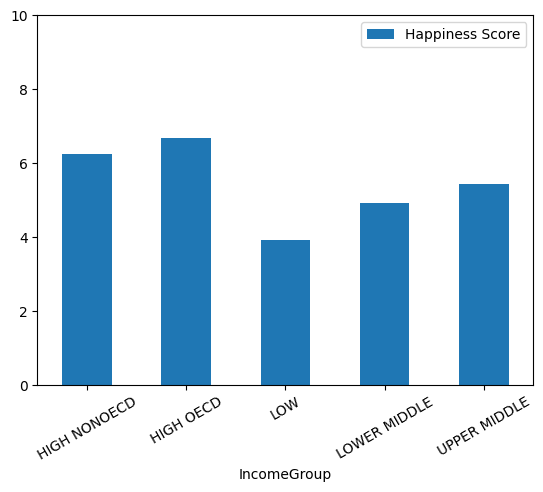

In [14]:
import matplotlib.pyplot as plt
merged['IncomeGroup']=merged['IncomeGroup'].str.replace(' income','')
merged['IncomeGroup']=merged['IncomeGroup'].str.replace(':','')
merged['IncomeGroup']=merged['IncomeGroup'].str.upper()

pv_incomes=merged.pivot_table(index='IncomeGroup',values='Happiness Score')
pv_incomes.plot(kind='bar',rot=30,ylim=(0,10))
plt.show()